In [1]:
import tifffile as tiff
import numpy as np
from PIL import Image
#Image.MAX_IMAGE_PIXELS = 1000000000
import matplotlib.pyplot as plt
from osgeo import gdal
from osgeo_utils import gdal_merge
#import cv2

import os

import scipy.misc

from utils import read_mod09ga_tiff_refl_bands, make_tc_corrected_img_from_bands, save_true_color_img

gdal.UseExceptions()

In [2]:
modis_tower_path = "/home/mxh/MODIS_MOD09GA_GERITAFRA_31day_DEC2023/"
modis_volume_path="/media/mxh/Volume/SAT-DATA/MODIS_MOD09GA_GERITAFRA_31day_DEC2023/"

modis_win_path = "F:\\Bachelorarbeit\\sat-data\\modis\\MODIS_MOD09GA_GERITAFRA_31day_DEC2023\\"
modis_x_path = "/mnt/f/Bachelorarbeit/sat-data/modis/MODIS_MOD09GA_GERITAFRA_31day_DEC2023/"
modis_wsl_path = "/home/sisa/sat-data/MODIS_MOD09GA_GERITAFRA_31day_DEC2023/"# "\\wsl.localhost\fedora39\home\sisa\sat-data"

# experiments
modis_exp2_wsl_path = "/home/sisa/sat-data/MODIS_MOD09GA_GERITAFRA_31day_DEC2023/experiment2/"
modis_exp2_tower_path = modis_tower_path + "experiment2/"


modis_path = modis_exp2_tower_path

In [3]:
days = {
0: "MOD09GA.A2023335.h18v04.061.2023340033530.hdf",
1: "MOD09GA.A2023336.h18v04.061.2023338023416.hdf",
2: "MOD09GA.A2023337.h18v04.061.2023339023523.hdf",
3: "MOD09GA.A2023338.h18v04.061.2023340034455.hdf", 
4: "MOD09GA.A2023339.h18v04.061.2023341041457.hdf",
5: "MOD09GA.A2023340.h18v04.061.2023342030232.hdf",
6: "MOD09GA.A2023341.h18v04.061.2023343024753.hdf",
7: "MOD09GA.A2023342.h18v04.061.2023344024915.hdf",
8: "MOD09GA.A2023343.h18v04.061.2023345024918.hdf",
9: "MOD09GA.A2023344.h18v04.061.2023346030519.hdf",
10: "MOD09GA.A2023345.h18v04.061.2023347025532.hdf",
11: "MOD09GA.A2023346.h18v04.061.2023348030312.hdf",
12: "MOD09GA.A2023347.h18v04.061.2023349025736.hdf",
13: "MOD09GA.A2023348.h18v04.061.2023350024202.hdf",
14: "MOD09GA.A2023349.h18v04.061.2023351023935.hdf",
15: "MOD09GA.A2023350.h18v04.061.2023352030330.hdf",
16: "MOD09GA.A2023351.h18v04.061.2023353030525.hdf",
17: "MOD09GA.A2023352.h18v04.061.2023354042819.hdf",
18: "MOD09GA.A2023353.h18v04.061.2023355063849.hdf",
19: "MOD09GA.A2023354.h18v04.061.2023356042206.hdf",
20: "MOD09GA.A2023355.h18v04.061.2023357031321.hdf",
21: "MOD09GA.A2023356.h18v04.061.2023361000333.hdf",
22: "MOD09GA.A2023357.h18v04.061.2023359024858.hdf",
23: "MOD09GA.A2023358.h18v04.061.2023360025923.hdf",
24: "MOD09GA.A2023359.h18v04.061.2023361050233.hdf",
25: "MOD09GA.A2023360.h18v04.061.2023362134719.hdf",
26: "MOD09GA.A2023361.h18v04.061.2023363043955.hdf",
27: "MOD09GA.A2023362.h18v04.061.2023364042452.hdf",
28: "MOD09GA.A2023363.h18v04.061.2023365041515.hdf",
29: "MOD09GA.A2023364.h18v04.061.2024001025343.hdf",
30: "MOD09GA.A2023365.h18v04.061.2024004181336.hdf"
}

## Output from --img=x.hdf

In [26]:
filename= "exp_6.1_mod-hdf_ql-mod_days-7-20_interpolated_MOD09GA.A2023341.h18v04.061.2023343024753.tif"# "exp_6_mod-hdf_ql-mod_days-7-20_interpolated_MOD09GA.A2023341.h18v04.061.2023343024753.tif"

In [27]:
file = gdal.Open(modis_path + filename)

In [28]:
data = file.ReadAsArray()

In [29]:
data.shape

(4, 2400, 2400)

In [30]:
data[:,0,0]

array([  45,  -18, 1030,  433], dtype=int16)

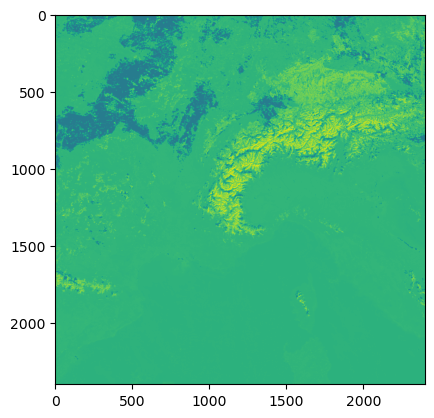

In [31]:
plt.imshow(data[3,:,:])

### TC for Interpolated

#### test file

In [32]:
#filename = "exp_6_mod-hdf_ql-mod_days-7-20_interpolated_MOD09GA.A2023341.h18v04.061.2023343024753.tif"

In [33]:
r_band,g_band,b_band = read_mod09ga_tiff_refl_bands(modis_path, filename)

In [34]:
r_band

array([[  45,   35,  435, ...,  409,  503,  408],
       [  45,   56,  398, ...,  406,  622,  756],
       [ 399,  417,  420, ..., 2627, 1057, 1054],
       ...,
       [ 721,  752,  770, ...,   17,   17,   20],
       [ 704,  788,  810, ...,   -2,   -2,    8],
       [ 671,  762,  857, ...,   12,   12,   15]], dtype=int16)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


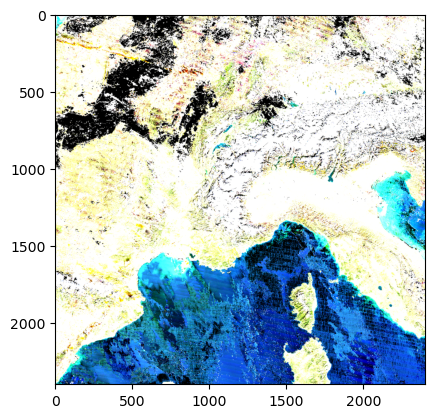

In [35]:
plt.imshow(np.dstack([r_band, g_band, b_band]))

In [36]:
tc, _ = make_tc_corrected_img_from_bands(r_band, g_band, b_band, refl_percent=0.1)

In [ ]:
plt.imsave("tc_test.png", tc)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


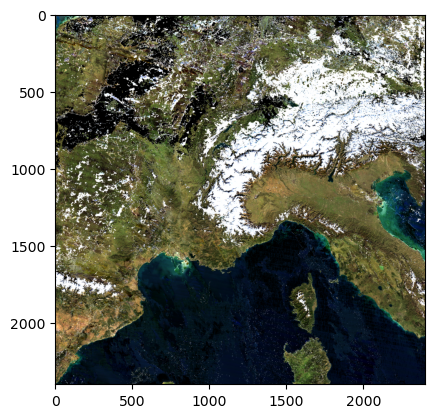

In [37]:
plt.imshow(tc)

### make and save TC for all files in folder

In [22]:
_ =  "exp_6_mod-hdf_ql-mod_days-7-20_interpolated_MOD09GA.A2023341.h18v04.061.2023343024753.tif"
exp_prefix = "exp_5_mod-hdf_ql-mod_days-7-20_interpolated_"
extension = ".tif"

In [23]:
modis_path

'/home/mxh/MODIS_MOD09GA_GERITAFRA_31day_DEC2023/experiment2/'

In [24]:
files = os.listdir(modis_path)

In [25]:
interpolated_tif_files = [f for f in files if exp_prefix == f[:len(exp_prefix)] and f[-len(extension):] == extension]


In [26]:
interpolated_tif_files

['exp_5_mod-hdf_ql-mod_days-7-20_interpolated_MOD09GA.A2023353.h18v04.061.2023355063849.tif',
 'exp_5_mod-hdf_ql-mod_days-7-20_interpolated_MOD09GA.A2023352.h18v04.061.2023354042819.tif',
 'exp_5_mod-hdf_ql-mod_days-7-20_interpolated_MOD09GA.A2023344.h18v04.061.2023346030519.tif',
 'exp_5_mod-hdf_ql-mod_days-7-20_interpolated_MOD09GA.A2023348.h18v04.061.2023350024202.tif',
 'exp_5_mod-hdf_ql-mod_days-7-20_interpolated_MOD09GA.A2023346.h18v04.061.2023348030312.tif',
 'exp_5_mod-hdf_ql-mod_days-7-20_interpolated_MOD09GA.A2023341.h18v04.061.2023343024753.tif',
 'exp_5_mod-hdf_ql-mod_days-7-20_interpolated_MOD09GA.A2023349.h18v04.061.2023351023935.tif',
 'exp_5_mod-hdf_ql-mod_days-7-20_interpolated_MOD09GA.A2023343.h18v04.061.2023345024918.tif',
 'exp_5_mod-hdf_ql-mod_days-7-20_interpolated_MOD09GA.A2023347.h18v04.061.2023349025736.tif',
 'exp_5_mod-hdf_ql-mod_days-7-20_interpolated_MOD09GA.A2023342.h18v04.061.2023344024915.tif',
 'exp_5_mod-hdf_ql-mod_days-7-20_interpolated_MOD09GA.A20233

In [27]:
percent = 0.15

In [28]:
extension = ".tif"
postfix = f"_rgb_scaled_tc_{str(percent)}"

In [29]:
for f in interpolated_tif_files:
    filename = f[:-len(extension)] # get filename without extension
    r_band, g_band, b_band = read_mod09ga_tiff_refl_bands(modis_path, f)
    tc_img, _ = make_tc_corrected_img_from_bands(r_band, g_band, b_band, refl_percent=percent)

    # now with dpi 300
    #save_true_color_img(modis_path, filename, tc_img, refl_percent=percent)
    #save_true_color_img(modis_path, filename, tc_img, refl_percent=percent, new_shape=(480,480))
    
    # save svg
    # save_true_color_img(modis_path, filename, tc_img, refl_percent=percent, new_shape=(480,480), extension=".svg")
    save_true_color_img(modis_path, filename, tc_img, refl_percent=percent, extension=".svg")

## Output from --img=x_merged_2400.tiff

In [46]:
filename = "exp_3_mod-tiff_ql-img_days-7-20_interpolated_MOD09GA.A2023341.h18v04.061.2023343024753_merged_2400.tif"

In [47]:
file = gdal.Open(modis_exp2_wsl_path + filename)

In [48]:
data = file.ReadAsArray()

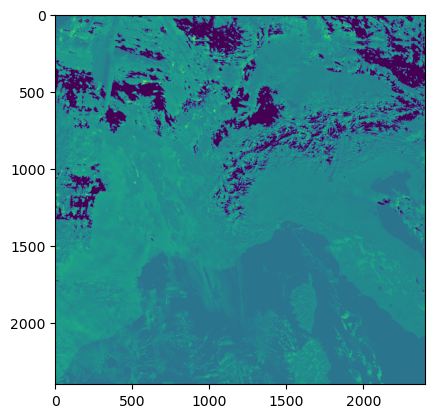

In [52]:
plt.imshow(data[1,:,:])

## Stats files

### Experiment 2
- exp_6.2_mod-hdf_ql-mod_days-7-20_stats_limit-days-3


In [1]:
num_of_not_interp_values = [10091600, 9360880, 9050752, 8411936, 8966368, 7405152, 4936960, 3505664, 2389248, 2112288, 2240176, 2301824, 2544880]

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

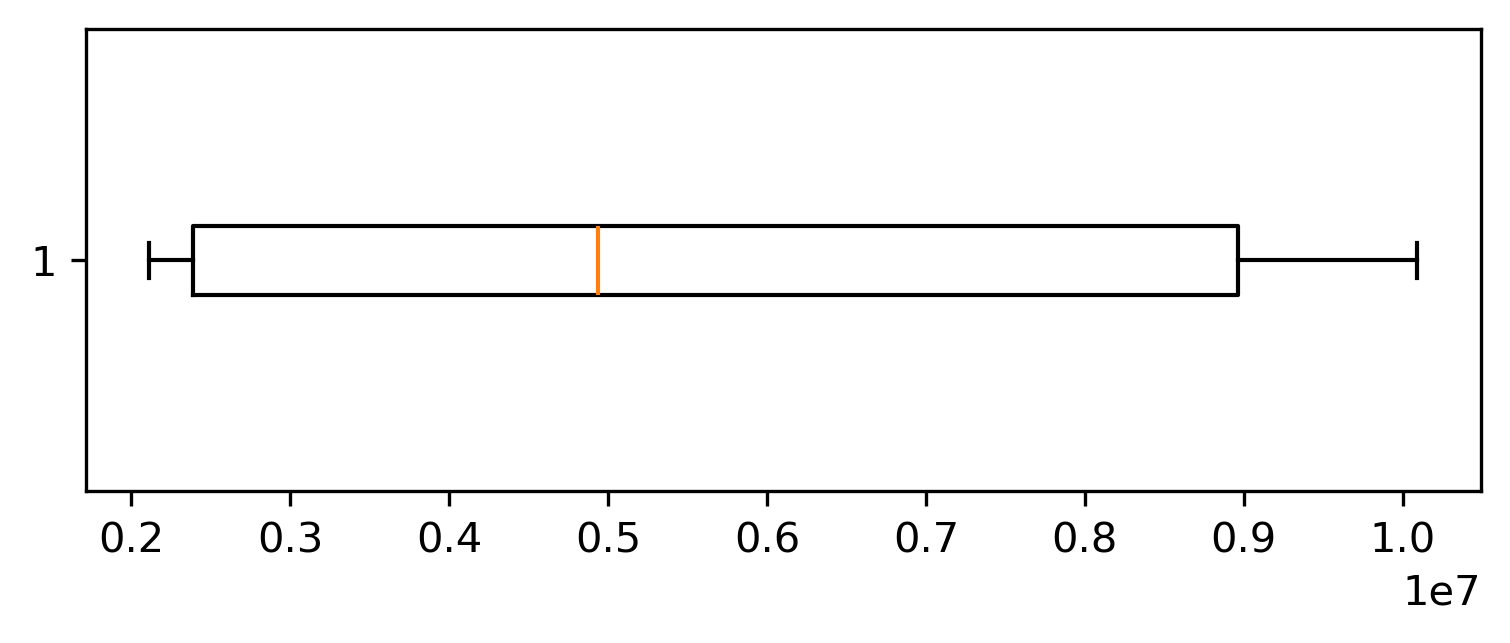

In [4]:
plt.figure(figsize=(6,2), dpi=300)
plt.boxplot(num_of_not_interp_values, vert=False, manage_ticks=True, patch_artist=False)
plt.savefig("fig_exp2_62_boxplot.svg", format="svg")

#### Experiment 2 - limit days 12

In [15]:
exp2_6_1_num_vals_to_interpolate = [16246272,22406880, 18963744, 13976944, 21270992, 22280208, 21909360, 18892912,12161888, 10959184, 9543904, 9086976 , 10925280]

### Experiment 3

In [16]:
exp3_1_num_vals_to_interpolate = [7831448, 20334420, 14275456, 6837808, 13240472, 14328468, 17146848, 12450444, 7729284, 4782972, 2241348, 3318312, 5857900]

### Experiment 4 (multi-categorical)

In [17]:
exp4_1_num_vals_to_interpolate = [7411260, 20247776, 14591092, 8396532, 12965948, 14121784, 16159756, 12642344, 10004300, 8295496, 5555984, 6999476, 8826052]

## plotting

In [31]:
import numpy as np

#### plot

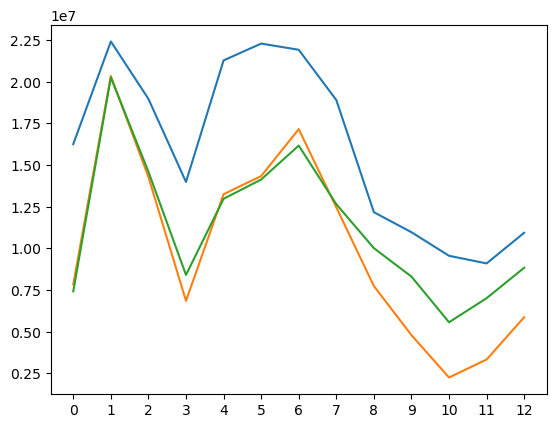

In [38]:
plt.plot(exp2_6_1_num_vals_to_interpolate, label="Experiment 2 Interpolation 6.1")
plt.plot(exp3_1_num_vals_to_interpolate, label="Experiment 3 Interpolation 1")
plt.plot(exp4_1_num_vals_to_interpolate, label="Experiment 4 Interpolation 1")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.show()

#### bar plot

In [61]:
data = {
    "Experiment 1: Quality Layer @ Limit 12 Tage": exp2_6_1_num_vals_to_interpolate,
    "Experiment 2: M1 Binäre Vorhersage @ Limit 12 Tage": exp3_1_num_vals_to_interpolate,
    "Experiment 3: M2.1 Kategorische Vorhersage @ Limit 12 Tage": exp4_1_num_vals_to_interpolate
}

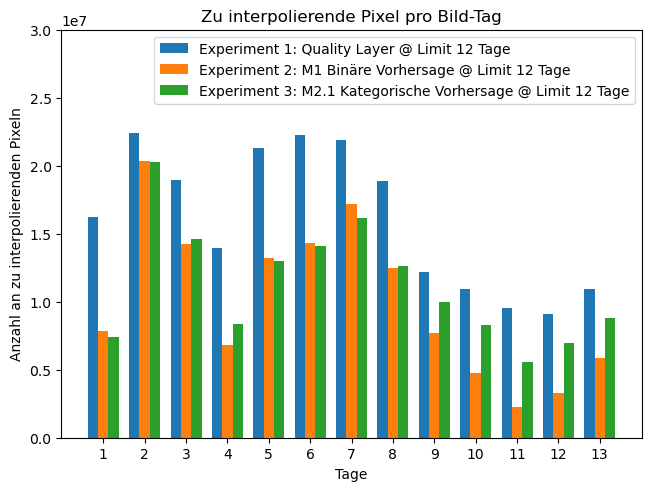

In [62]:
days =[0,1,2,3,4,5,6,7,8,9,10,11,12] #  [x for x in range(1,13*3,3)]#
days_labels= [str(x+1) for x in days]

x = np.arange(len(days))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3, label_type="edge")
    multiplier += 1

ax.set_ylabel('Anzahl an zu interpolierenden Pixeln')
ax.set_xlabel('Tage')
ax.set_title('Zu interpolierende Pixel pro Bild-Tag')
ax.set_xticks(x + width, days)
ax.set_xticklabels(labels=days_labels)
#ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 3e7)

#plt.yscale("log")
plt.legend()
plt.savefig("interpolate_pixel_barplot.svg", dpi=600, format="svg")